# Developing Trading Strategies with Genetic Algorithm
## Annex : In-Sample vs. Out-of-sample Regressions 
This notebook is an statistical annex to the Lean-based project ***Developing Trading Strategies with Genetic Algorithm***. The main post can be found [here](https://www.quantconnect.com/forum).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pylab as pylab
%matplotlib inline

from IPython.display import display, Markdown, Latex

In [3]:
base_path = 'C:/Users/jjd/Desktop/GAExperiment_2017-05-28_0211/'

In [4]:
# Read the data of all individual generated by the genetic algorithm and apply CamleCase format for the column names.
optimization_resutls = base_path + 'ResultsNoUnits.csv'
ga_results = pd.read_csv(optimization_resutls, )
camel_column_name = [n.replace(" ", "") for n in ga_results.columns]
ga_results.columns = camel_column_name

# The simple order in which the backtest results were saved will be used as individuals identification for further comparison.
ga_results['ID'] = ga_results.index

# Drop values with Drawdown equal to zero
ga_results = ga_results[ga_results.Drawdown!=0]
ga_results['SterlingRatio'] = ga_results.NetProfit / ga_results.Drawdown

In [5]:
statistics_cols = ['TotalTrades', 'AverageWin', 'AverageLoss', 'CompoundingAnnualReturn',
                   'Drawdown', 'Expectancy', 'NetProfit', 'SharpeRatio', 'LossRate',
                   'WinRate', 'Profit-LossRatio', 'Alpha', 'Beta', 'AnnualStandardDeviation',
                   'AnnualVariance', 'InformationRatio', 'TrackingError', 'TreynorRatio',
                   'TotalFees', 'ID', 'SterlingRatio']


# Read and join the 4 out-of-sample results
for i in range(1,5):
    out_of_sample_results = base_path + 'OutOfSample' + str(i) + 'Month/FullResutls.csv'
    oos_results = pd.read_csv(out_of_sample_results)
    oos_results['SterlingRatio'] = oos_results.NetProfit / oos_results.Drawdown
    oos_results['OosPeriod'] = str(i) + '_month'
    
    oos_results = oos_results.join(ga_results.loc[:, statistics_cols], on='ID', how='inner',
                                   lsuffix='_OOS', rsuffix='_IS')
    if(i==1):
        oos_vs_is = oos_results
    else:
        oos_vs_is = pd.concat([oos_vs_is, oos_results], axis=0)
    oos_vs_is = oos_vs_is.replace([np.inf, -np.inf], np.nan).fillna(value=0)

In [6]:
display(Markdown('### Regression with 4 out-of-sample periods.'))
x = sm.add_constant(oos_vs_is.SterlingRatio_IS, prepend=False)
y = oos_vs_is.SharpeRatio_OOS
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

### Regression with 4 out-of-sample periods.

                            OLS Regression Results                            
Dep. Variable:        SharpeRatio_OOS   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     136.9
Date:                Thu, 03 Aug 2017   Prob (F-statistic):           7.98e-29
Time:                        09:24:19   Log-Likelihood:                -1146.7
No. Observations:                 652   AIC:                             2297.
Df Residuals:                     650   BIC:                             2306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SterlingRatio_IS     0.6282      0.054  

In [7]:
for i in range(1,5):
    sample = str(i) + '_month'
    x = sm.add_constant(oos_vs_is[oos_vs_is.OosPeriod==sample].SterlingRatio_IS, prepend=False)
    y = oos_vs_is[oos_vs_is.OosPeriod==sample].SharpeRatio_OOS
    mod = sm.OLS(y, x)
    res = mod.fit()
    title = '### Regression with {0} month{1} out-of-sample period.'.format(i, '' if i==1 else 's')
    display(Markdown(title))
    print(res.summary())

### Regression with 1 month out-of-sample period.

                            OLS Regression Results                            
Dep. Variable:        SharpeRatio_OOS   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     88.83
Date:                Thu, 03 Aug 2017   Prob (F-statistic):           4.53e-17
Time:                        09:24:19   Log-Likelihood:                -172.60
No. Observations:                 163   AIC:                             349.2
Df Residuals:                     161   BIC:                             355.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SterlingRatio_IS     0.5051      0.054  

### Regression with 2 months out-of-sample period.

                            OLS Regression Results                            
Dep. Variable:        SharpeRatio_OOS   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     19.43
Date:                Thu, 03 Aug 2017   Prob (F-statistic):           1.90e-05
Time:                        09:24:19   Log-Likelihood:                -268.28
No. Observations:                 163   AIC:                             540.6
Df Residuals:                     161   BIC:                             546.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SterlingRatio_IS     0.4248      0.096  

### Regression with 3 months out-of-sample period.

                            OLS Regression Results                            
Dep. Variable:        SharpeRatio_OOS   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     96.97
Date:                Thu, 03 Aug 2017   Prob (F-statistic):           3.34e-18
Time:                        09:24:19   Log-Likelihood:                -262.02
No. Observations:                 163   AIC:                             528.0
Df Residuals:                     161   BIC:                             534.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SterlingRatio_IS     0.9133      0.093  

### Regression with 4 months out-of-sample period.

                            OLS Regression Results                            
Dep. Variable:        SharpeRatio_OOS   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     57.66
Date:                Thu, 03 Aug 2017   Prob (F-statistic):           2.39e-12
Time:                        09:24:19   Log-Likelihood:                -253.78
No. Observations:                 163   AIC:                             511.6
Df Residuals:                     161   BIC:                             517.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SterlingRatio_IS     0.6696      0.088  

## Sharpe Ratio In-Sample vs. Out-of-sample

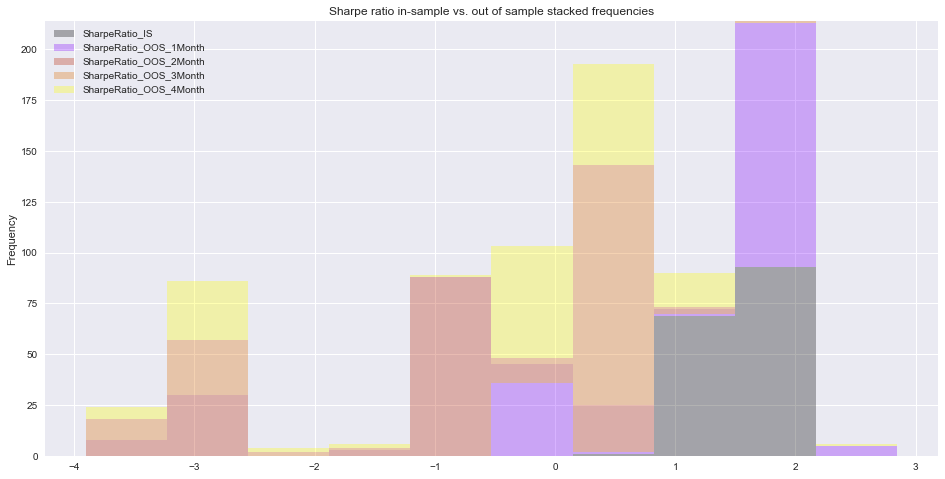

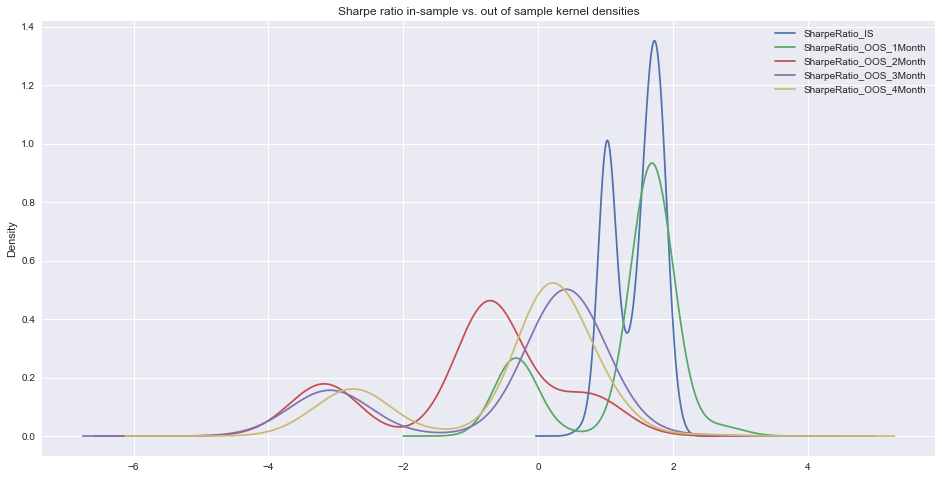

In [8]:
oos_vs_is.OosPeriod.unique()
df_for_kde = pd.DataFrame({"SharpeRatio_IS":oos_vs_is[oos_vs_is.OosPeriod=='1_month'].SharpeRatio_IS,
                           "SharpeRatio_OOS_1Month":oos_vs_is[oos_vs_is.OosPeriod=='1_month'].SharpeRatio_OOS,
                           "SharpeRatio_OOS_2Month":oos_vs_is[oos_vs_is.OosPeriod=='2_month'].SharpeRatio_OOS,
                           "SharpeRatio_OOS_3Month":oos_vs_is[oos_vs_is.OosPeriod=='3_month'].SharpeRatio_OOS,
                           "SharpeRatio_OOS_4Month":oos_vs_is[oos_vs_is.OosPeriod=='4_month'].SharpeRatio_OOS,
                          })
df_for_kde.plot.hist(figsize=(16,8), stacked=True, alpha = 0.3, colormap='gnuplot',
                     title='Sharpe ratio in-sample vs. out of sample stacked frequencies');
df_for_kde.plot.kde(figsize=(16,8), title='Sharpe ratio in-sample vs. out of sample kernel densities');